# Patient 01 Tumor & Tumor-Blood Matching TCR Analysis

In [43]:
# load packages
import sys
import scanpy as sc
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm


In [44]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [45]:
# set up figure parameters
plt.rcParams['figure.figsize'] = (3.0, 3.0)
sc.settings.verbosity = 0
sc.set_figure_params(dpi=120, dpi_save=600, format='png', figsize=(3, 3))

In [46]:
# set working and fig dir
work_dir = "/scratch_isilon/groups/singlecell/gdeuner/SERPENTINE/data/TCR_tumor_blood_analysis/Patient_01"
sc.settings.figdir = os.path.join(work_dir, "plots")
fig_dir = os.path.join(work_dir, "plots")

In [47]:
# read anndata object
adata = sc.read_h5ad("/scratch_isilon/groups/singlecell/gdeuner/SERPENTINE/data/outputdata/Patient_01/P01_TNK_TCR_updated_07-05-24.h5ad")
adata

AnnData object with n_obs × n_vars = 8383 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'project', 'sample', 'patient', 'timepoint', 'cells', 'percent.mt', 'doublet_score', 'barcode', 'RNA_snn_res.0.8', 'seurat_clusters', 'RNA_snn_res.0.1', 'cluster_res0.1', 'RNA_snn_res.0.25', 'cluster_res0.25', 'RNA_snn_res.0.5', 'cluster_res0.5', 'RNA_snn_res.0.75', 'cluster_res0.75', 'RNA_snn_res.1', 'cluster_res1', 'RNA_snn_res.1.2', 'cluster_res1.2', 'RNA_snn_res.1.4', 'cluster_res1.4', 'RNA_snn_res.1.5', 'cluster_res1.5', 'RNA_snn_res.1.6', 'cluster_res1.6', 'RNA_snn_res.1.8', 'cluster_res1.8', 'RNA_snn_res.2', 'cluster_res2', 'RNA_snn_res.2.2', 'cluster_res2.2', 'RNA_snn_res.2.4', 'cluster_res2.4', 'RNA_snn_res.2.6', 'cluster_res2.6', 'RNA_snn_res.2.7', 'cluster_res2.7', 'RNA_snn_res.2.8', 'cluster_res2.8', 'RNA_snn_res.3', 'cluster_res3', 'Annotation_1.0', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'clonalProportion', 'clonalFrequency', 'cloneSize', 'sample_id', 'Annotation_2.0_old', 

In [48]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,project,sample,patient,timepoint,cells,percent.mt,doublet_score,...,CTnt_TRA,CTnt_TRB,CTnt_TRB_short,cell_type,blood_pre,blood_post,blood,cdr3_nt_diffExp,compartment_diffExp,tumour_diffExp
SERPENTINE_04_05_01_CD45_AAACCTGAGTTAAGTG,SERPENTINE,4019.0,1767,SERPENTINE_04_05,SCR.2.CD45,01,SCR,CD45pos,4.155263,0.118199,...,TGTGCAGAGATGGCCTATATGCTCACCTTT;TGTGTGGTGAGCCTA...,TGCGCCAGCAGCTATGGTGGATTCCCAGAGACCCAGTACTTC,GCCAGCAGCTATGGTGGATTCCCAGAGACCCAGTAC,CD8 T,FALSE,FALSE,FALSE,NA,NA,NA
SERPENTINE_04_05_01_CD45_AAACCTGTCCGCAGTG,SERPENTINE,4777.0,2281,SERPENTINE_04_05,SCR.2.CD45,01,SCR,CD45pos,2.323634,0.066998,...,TGTGCTGTGAGAGAGGACACGGGCAGGAGAGCACTTACTTTT,TGCAGCGTCCCCCTGGGGGCTGGGGAAGCTTTCTTT,AGCGTCCCCCTGGGGGCTGGGGAAGCTTTC,CD8 T,TRUE,TRUE,TRUE,NA,NA,NA
SERPENTINE_04_05_01_CD45_AAACGGGAGCGTTTAC,SERPENTINE,5180.0,1570,SERPENTINE_04_05,SCR.2.CD45,01,SCR,CD45pos,3.339768,0.025641,...,TGTGCAGTCCATCAGGGCGGATCTGAAAAGCTGGTCTTT,TGTGCCTGGAGTGTTGGGGGCGTGGATGAAAAACTGTTTTTT,GCCTGGAGTGTTGGGGGCGTGGATGAAAAACTGTTT,CD4 T,TRUE,FALSE,TRUE,NA,NA,NA
SERPENTINE_04_05_01_CD45_AAACGGGCAAGGTTCT,SERPENTINE,2901.0,1204,SERPENTINE_04_05,SCR.2.CD45,01,SCR,CD45pos,4.550155,0.021162,...,TGTGCTGTGAGTGATCAGGGCGACTACAAGCTCAGCTTT,TGCAGTGCTAAGGCCGGGCTAGCGGGGGTAGAGACCCAGTACTTC,AGTGCTAAGGCCGGGCTAGCGGGGGTAGAGACCCAGTAC,CD4 T,TRUE,FALSE,TRUE,NA,NA,NA
SERPENTINE_04_05_01_CD45_AAACGGGGTATCACCA,SERPENTINE,3640.0,1532,SERPENTINE_04_05,SCR.2.CD45,01,SCR,CD45pos,3.186813,0.032102,...,TGTGCTGTGAGTGACGCGGAGGGAGCCCAGAAGCTGGTATTT,TGTGCCAGCAGCTTAATTATGACAGGGAGCCCTGGAAACACCATAT...,GCCAGCAGCTTAATTATGACAGGGAGCCCTGGAAACACCATATAT,CD8 T,TRUE,TRUE,TRUE,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SERPENTINE_08_09_SPE_1_01_C2D1_A_FRESH_2_TTTGGTTTCTATCCTA,SERPENTINE,7451.0,2881,SERPENTINE_08_09,C02.2,01,C2,all,3.180781,0.046058,...,TGTGCTCTAAACGGGAGGCTCACGGGAGGAGGAAACAAACTCACCTTT,TGCGCCAGCAGCCCTGGGTTCGGGGGGGCTCATGAGCAGTTCTTC,GCCAGCAGCCCTGGGTTCGGGGGGGCTCATGAGCAGTTC,CD8 T,FALSE,TRUE,TRUE,NA,NA,NA
SERPENTINE_08_09_SPE_1_01_C2D1_A_FRESH_2_TTTGGTTTCTCATTCA,SERPENTINE,5733.0,2303,SERPENTINE_08_09,C02.2,01,C2,all,7.622536,0.059145,...,NA,NA,NA,NKT-like,FALSE,FALSE,FALSE,NA,NA,NA
SERPENTINE_08_09_SPE_1_01_C2D1_A_FRESH_2_TTTGTCAAGGACAGAA,SERPENTINE,3851.0,1574,SERPENTINE_08_09,C02.2,01,C2,all,2.233186,0.089588,...,TGCACTATGTACAATAACAATGACATGCGCTTT,TGTGCCAGCAGTCAAGGACAGCAACAGTACTTC,GCCAGCAGTCAAGGACAGCAACAGTAC,CD8 T,FALSE,TRUE,TRUE,NA,NA,NA
SERPENTINE_08_09_SPE_1_01_C2D1_A_FRESH_2_TTTGTCAGTAAATACG,SERPENTINE,7700.0,2553,SERPENTINE_08_09,C02.2,01,C2,all,6.389610,0.070576,...,TGTGCAGCAAGCTCAATGTACAATAACAATGACATGCGCTTT,TGTGCCAGCAGCCCCGGGGCTACAGATACGCAGTATTTT,GCCAGCAGCCCCGGGGCTACAGATACGCAGTAT,CD4 T,FALSE,TRUE,TRUE,NA,NA,NA


In [49]:
adata.obs["Annotation_2.0"].unique()

array(['CD8 T TRM PreExhausted', 'CD8 T Proliferative',
       'CD4 T Central Memory', 'CD4 T CM/EarlyActivated',
       'CD8 T Effector', 'NKT-like', 'CD8 T TRM Effector',
       'CD8 T TRM Exhausted', 'CD4 T Regulatory', 'CD8 T Naive',
       'CD8 T MAIT', 'CD4 T Naive', 'CD4 T Follicular Helper',
       'CD4 T ISG+', 'CD4 T Helper-like', 'CD4 T Proliferative'],
      dtype=object)

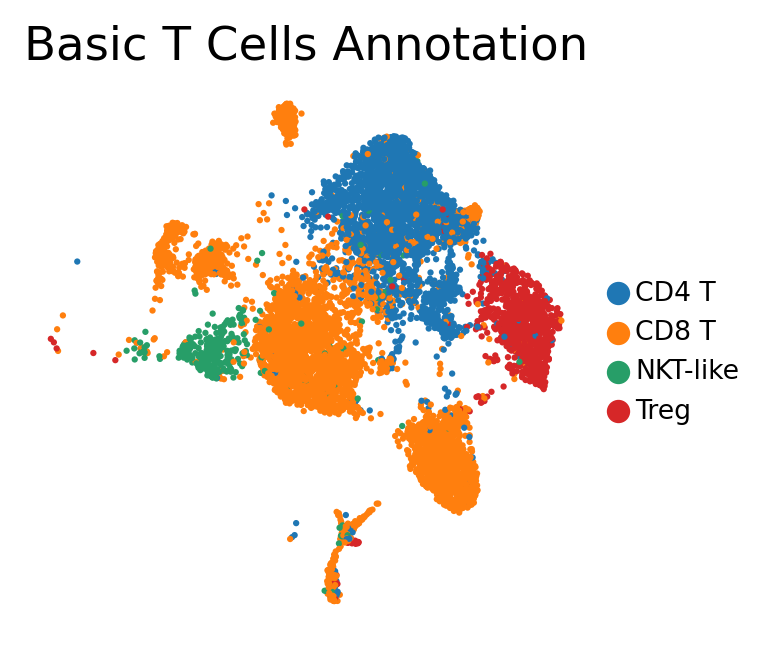

In [50]:
# basic T cells annotation
sc.pl.umap(
        adata,
        color="cell_type",
        vmin=0,
        vmax="p99",  
        sort_order=False,  
        frameon=False,
        use_raw=False,
        title="Basic T Cells Annotation",
        legend_fontsize=8,
        save = "_P01_Basic_T_Cells_Annotation.png" 
)

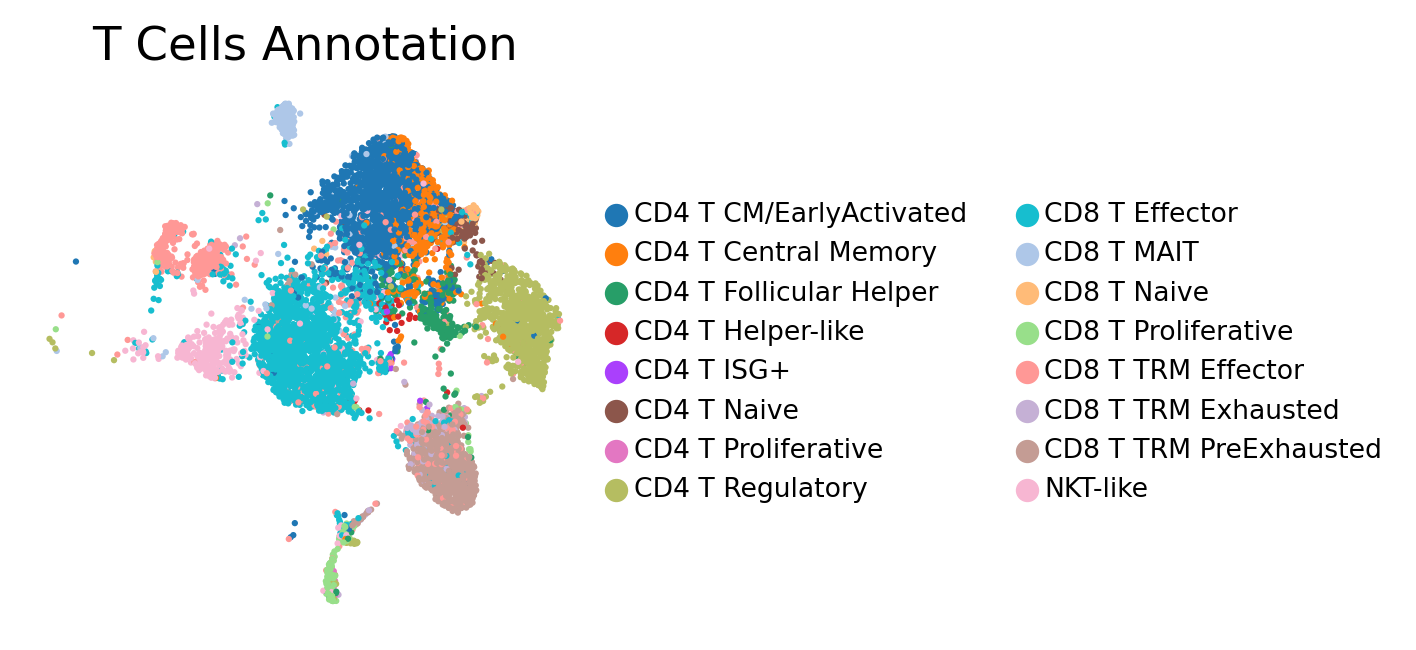

In [51]:
# plot annotation 2.0
sc.pl.umap(
        adata,
        color="Annotation_2.0",
        vmin=0,
        vmax="p99",  
        sort_order=False,  
        frameon=False,
        use_raw=False,
        title="T Cells Annotation",
        legend_fontsize=8,
        save = "_P01_Refined_T_Cells_Annotation.png"
)

In [52]:
adata.obs['cloneSize'].unique()

['Small (1 < X <= 5)', 'Medium (5 < X <= 20)', 'Single (0 < X <= 1)', 'Hyperexpanded (50 < X <= 103)', 'NA', 'Large (20 < X <= 50)']
Categories (6, object): ['Hyperexpanded (50 < X <= 103)', 'Large (20 < X <= 50)', 'Medium (5 < X <= 20)', 'NA', 'Single (0 < X <= 1)', 'Small (1 < X <= 5)']

In [53]:
# order cloneSize var
legend_order = ['Hyperexpanded (50 < X <= 103)', 'Large (20 < X <= 50)', 'Medium (5 < X <= 20)',
               'Small (1 < X <= 5)', 'Single (0 < X <= 1)', 'NA']
adata.obs['cloneSize'] = pd.Categorical(adata.obs['cloneSize'], categories=legend_order)
#adata.obs['cloneSize'] = np.array(adata.obs['cloneSize'])

In [54]:
color_map = cm.get_cmap('inferno')
colorblind_vector = [color_map(i/4) for i in range(4, -1, -1)]
colorblind_vector.append("grey")
print(colorblind_vector)

[(0.988362, 0.998364, 0.644924, 1.0), (0.978422, 0.557937, 0.034931, 1.0), (0.735683, 0.215906, 0.330245, 1.0), (0.3415, 0.062325, 0.429425, 1.0), (0.001462, 0.000466, 0.013866, 1.0), 'grey']


In [55]:
# create a dictionary of cloneSize colors
colorblind_dict = dict(map(lambda i,j : (i,j) , legend_order, colorblind_vector))

In [56]:
# function to plot multiple umaps next to each other
def split_umap(adata_list, split_by, titles, ncol=2, nrow=1, **kwargs):
    categories = adata.obs[split_by].cat.categories
    if nrow is None:
        nrow = int(np.ceil(len(categories) / ncol))
    fig, axs = plt.subplots(nrow, ncol, figsize=(4*ncol, 3*nrow)) #5,4
    axs = axs.flatten()
    for i, cat in enumerate(categories):
        ax = axs[i]
        if i != len(categories)-1:
            sc.pl.umap(adata_list[i][adata_list[i].obs[split_by] == cat], title=titles[i], ax=ax, show=False,  **kwargs)
        else:
            sc.pl.umap(adata_list[i][adata_list[i].obs[split_by] == cat], title=titles[i], ax=ax, show=False,  **kwargs)

    plt.tight_layout()

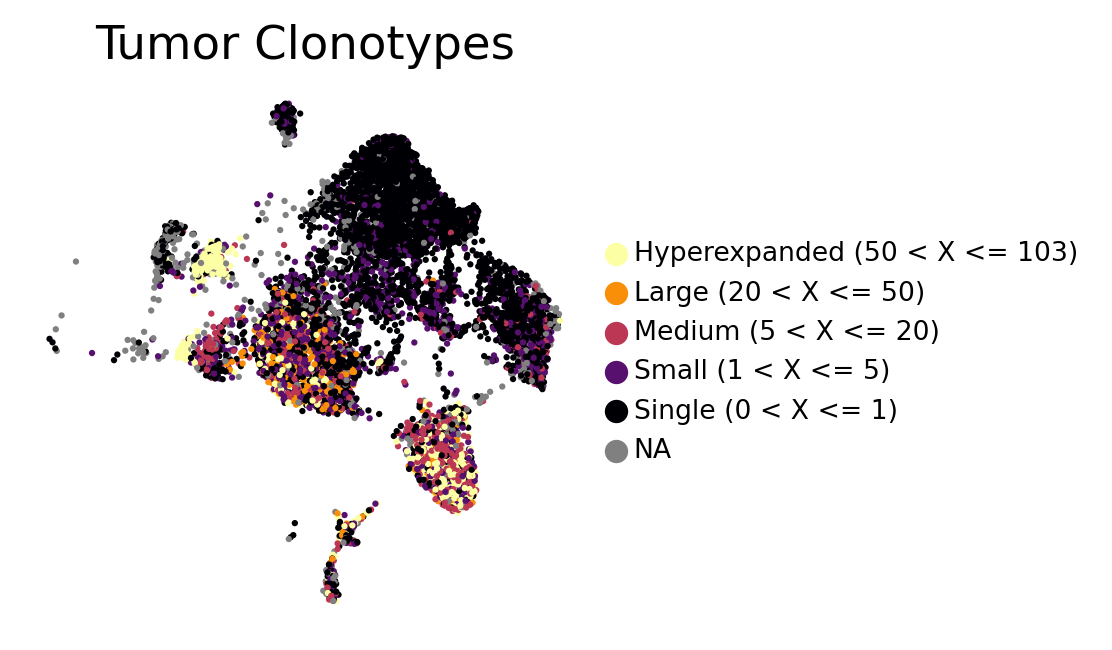

In [57]:
# Plot clonal expansion dynamics of tumor clonotypes 
sc.pl.umap(adata, 
           color=["cloneSize"], 
           palette=colorblind_dict,
           na_color = "grey",
           frameon=False,
           title="Tumor Clonotypes",
           legend_fontsize=8,
           save="_P01_Tumor_Clonotypes_Expansion.png"
)

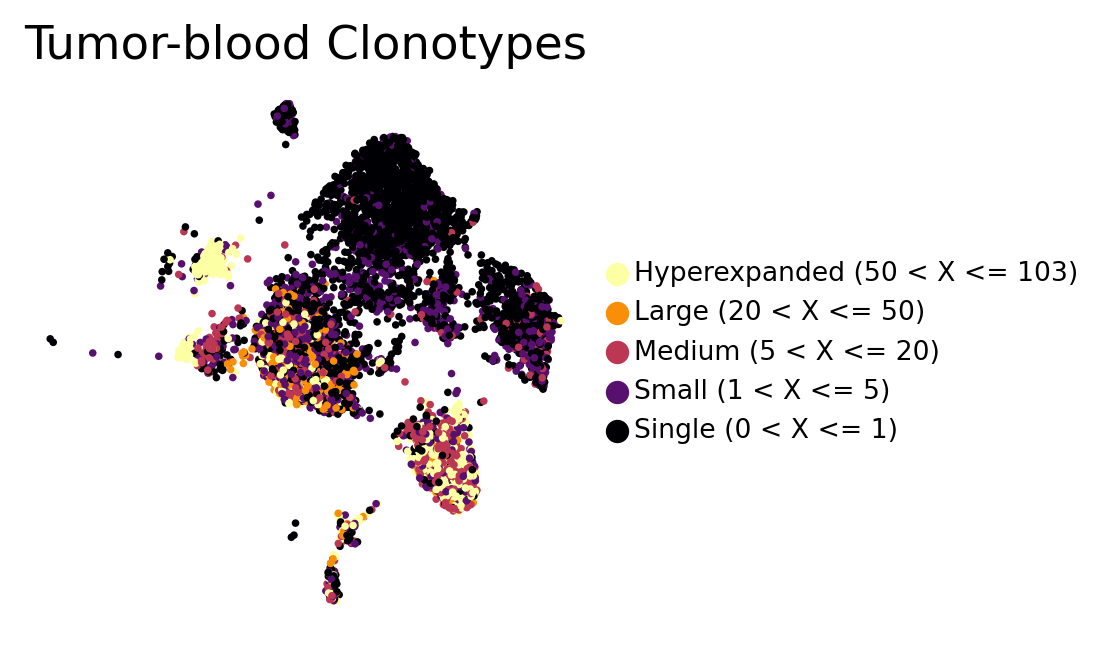

In [58]:
# Plot clonal expansion dynamics of blood & tumor matching clonotypes 
sc.pl.umap(adata[adata.obs.blood == "TRUE"],  
           color="cloneSize", 
           palette=colorblind_dict,
           frameon=False,
           title="Tumor-blood Clonotypes",
           legend_fontsize=8,
           save="_P01_Tumor-Blood_Clonotypes_Expansion.png"
)

In [59]:
adata.obs['timepoint'].unique()

['SCR', 'C2']
Categories (2, object): ['C2', 'SCR']

In [60]:
# order timepoint var

timepoint_order = ['SCR', 'C2']
adata.obs['timepoint'] = pd.Categorical(adata.obs['timepoint'], categories=timepoint_order)

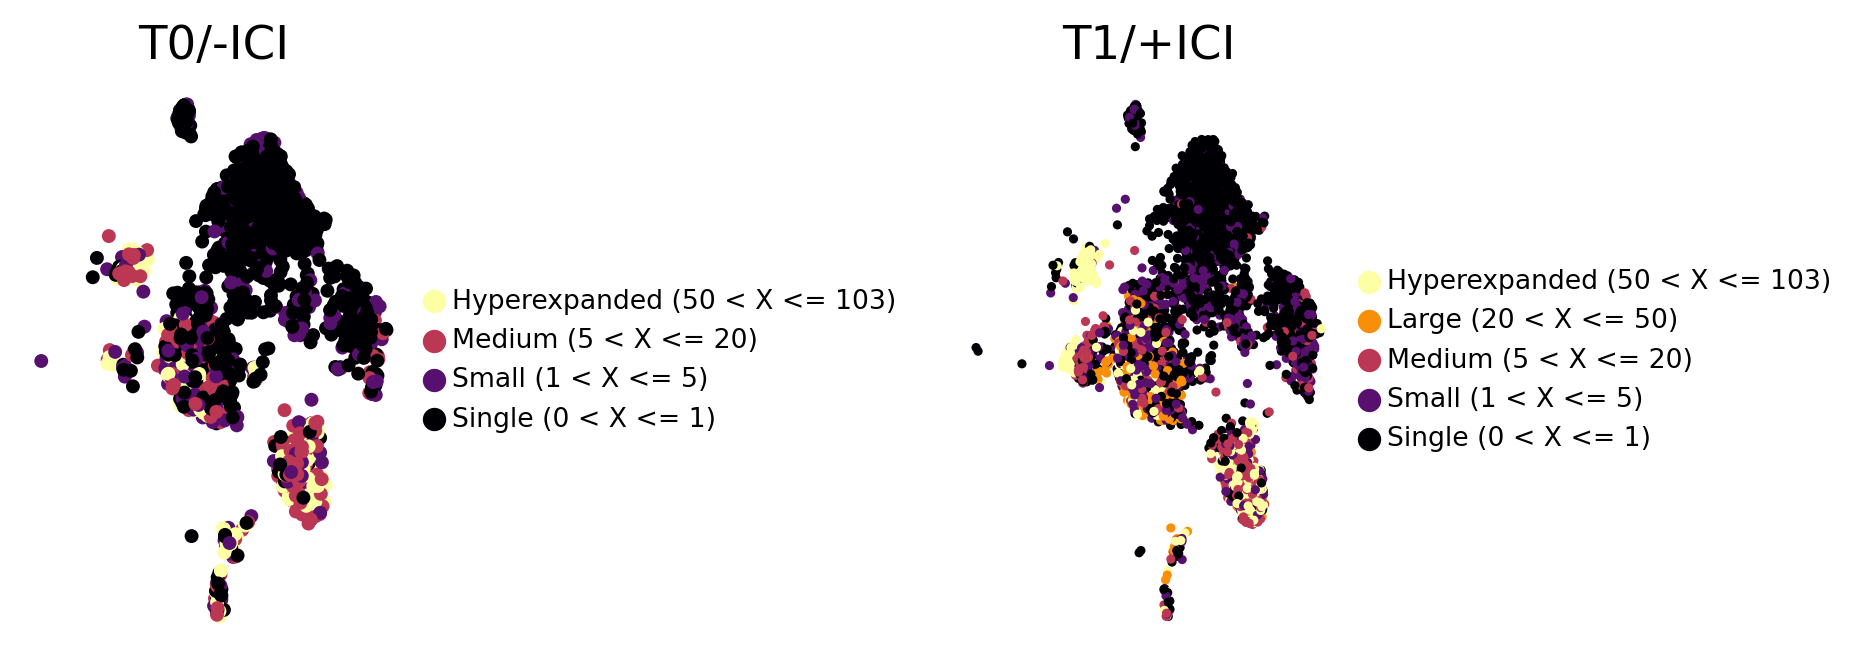

In [61]:
# Plot clonal expansion dynamics of blood & tumor matching clonotypes split by timepoint
split_umap(adata_list=[adata[adata.obs.blood_pre == "TRUE"], adata[adata.obs.blood_post == "TRUE"]],
           color="cloneSize", 
           split_by="timepoint",
           titles=["T0/-ICI", "T1/+ICI"],
           palette=colorblind_dict,
           frameon=False,
           legend_fontsize=8
          )
plt.savefig(os.path.join(fig_dir, "umap" + "_P01_Tumor-Blood_Clonotypes_Expansion_splitBy_Timepoint.png"), dpi=300, format="png", bbox_inches="tight")

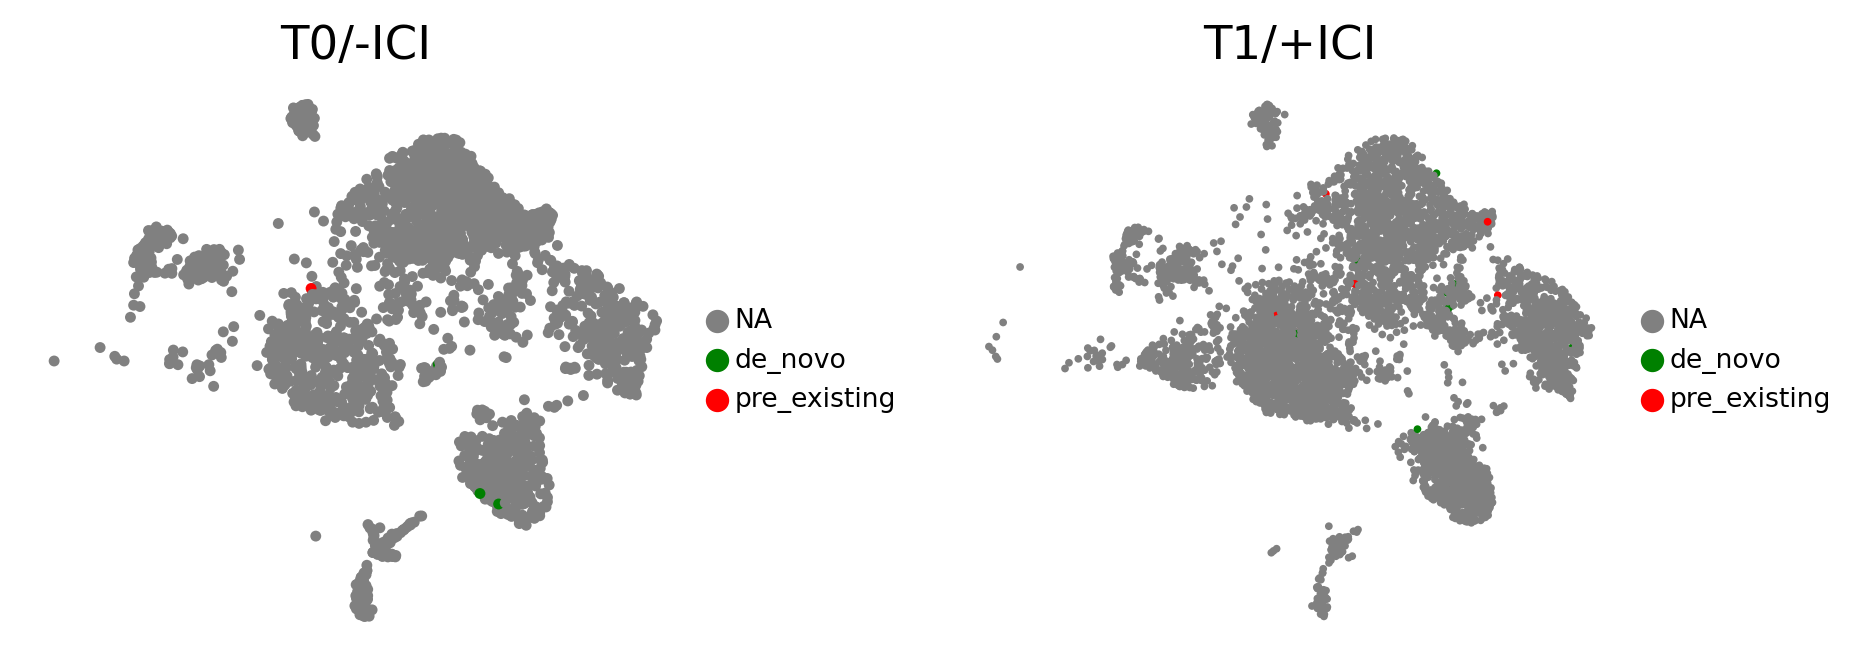

In [62]:
split_umap(adata_list=[adata, adata],
           color=["compartment_diffExp"], 
           split_by="timepoint",
           palette=["grey", "green", "red"],
           frameon=False,
           titles=["T0/-ICI", "T1/+ICI"],
           legend_fontsize=8
)
plt.savefig(os.path.join(fig_dir, "umap" + "_P01_diffExp_tumor-blood_clonotypes.png"), dpi=300, format="png", bbox_inches="tight")

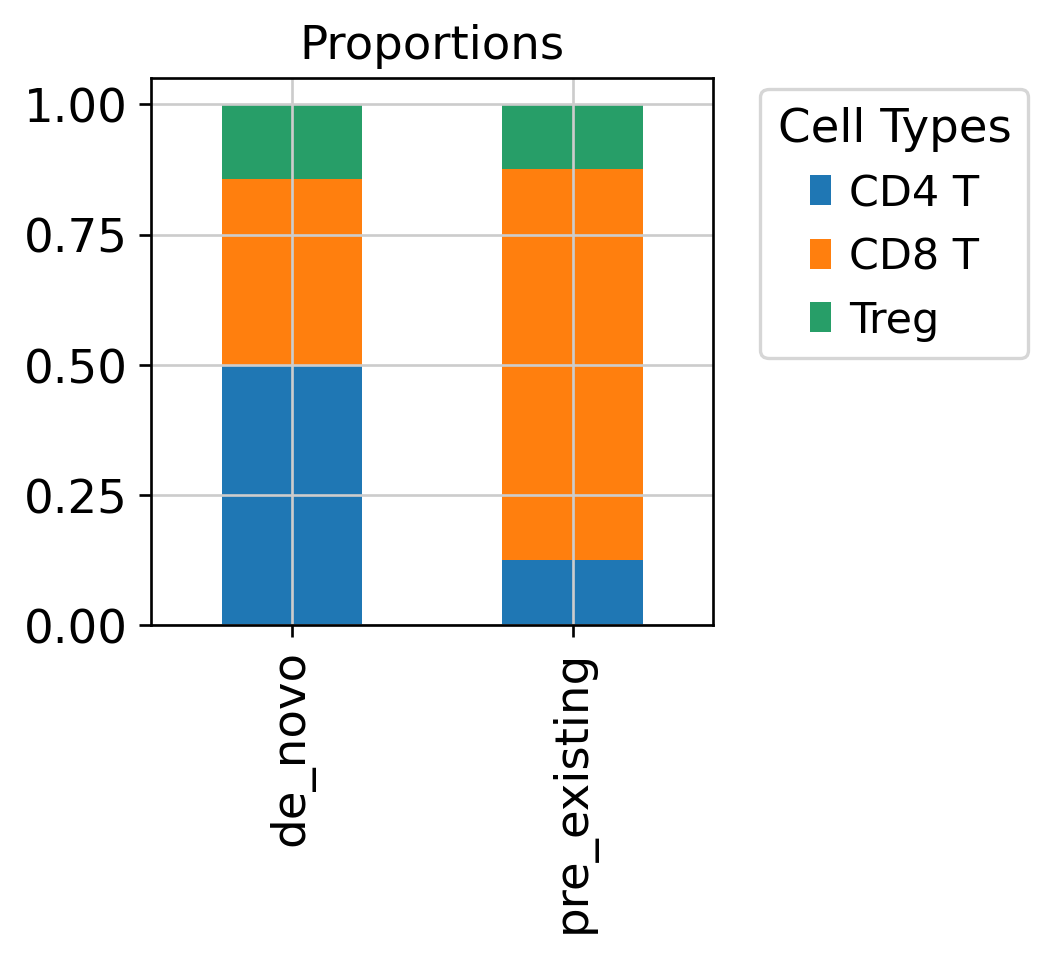

In [63]:
adata_filt = adata[adata.obs['compartment_diffExp'] != "NA"].copy()
tmp = pd.crosstab(adata_filt.obs['cell_type'],adata_filt.obs['compartment_diffExp'], normalize='columns').T.plot(kind='bar', stacked=True, title="Proportions")
plt.xlabel(None)
tmp.legend(title='Cell Types', bbox_to_anchor=(1.6, 1.02),loc='upper right')
plt.savefig(os.path.join(fig_dir, "P01_basic_cell_types_props.png"), dpi=300, format="png", bbox_inches="tight")

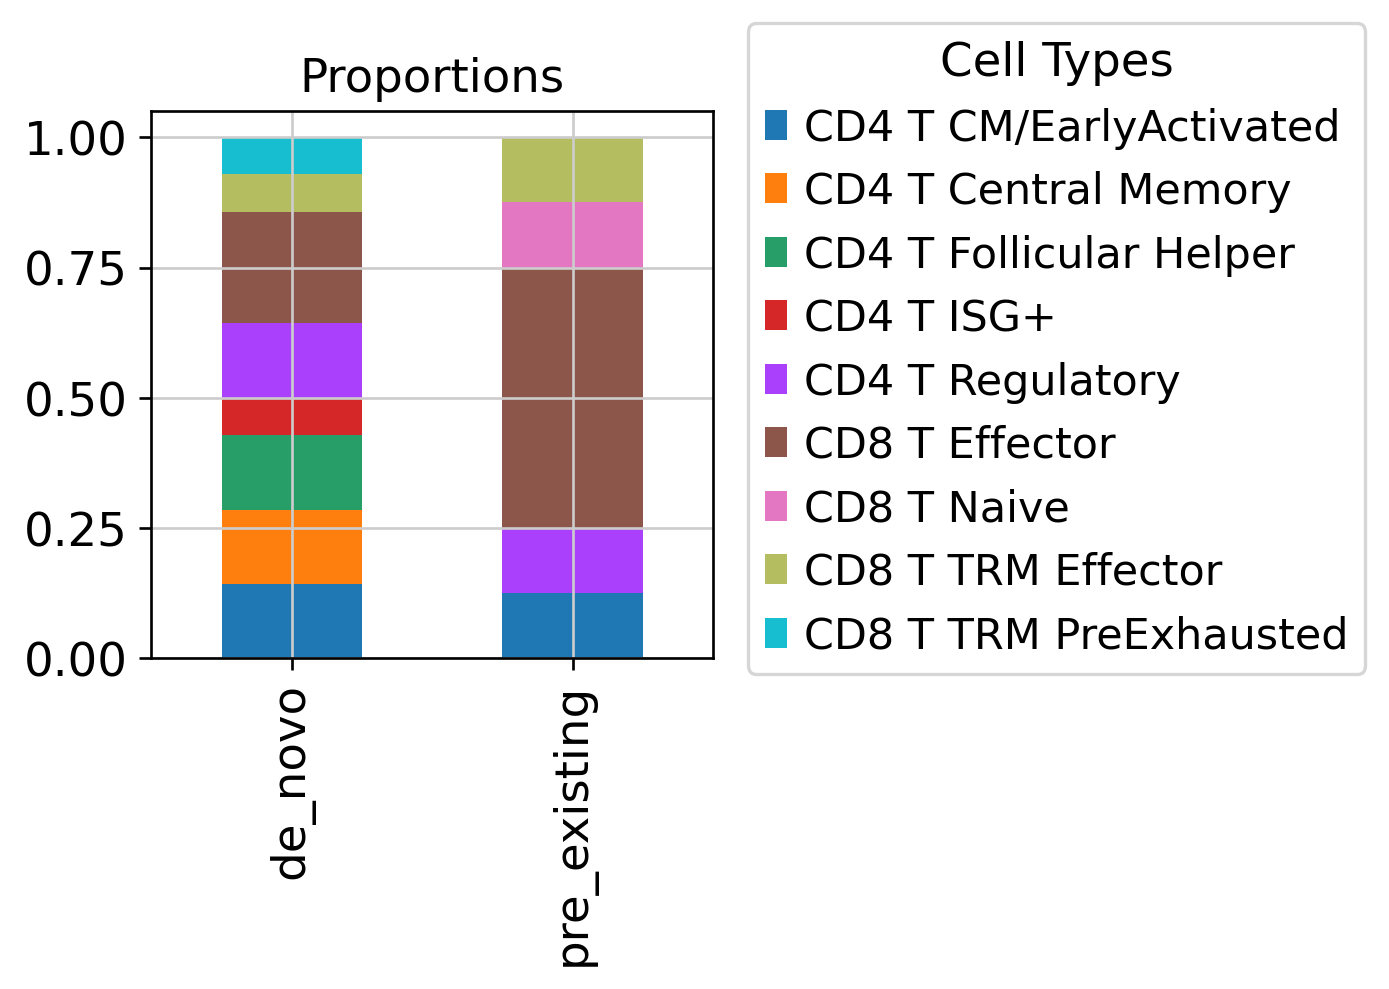

In [64]:
adata_filt = adata[adata.obs['compartment_diffExp'] != "NA"].copy()
tmp = pd.crosstab(adata_filt.obs['Annotation_2.0'], adata_filt.obs['compartment_diffExp'], normalize='columns').T.plot(kind='bar', stacked=True, title="Proportions")
plt.xlabel(None)
tmp.legend(title='Cell Types', bbox_to_anchor=(2.2, 1.2),loc='upper right')
plt.savefig(os.path.join(fig_dir, "P01_adv_cell_types_props.png"), dpi=300, format="png", bbox_inches="tight")